#  Digital Banking Fraud Detection Challenge

The rapid growth and widespread adoption of digital banking services have led to a corresponding increase in fraudulent transaction attempts, presenting a critical challenge for financial institutions. The primary goal is to implement sophisticated, real-time fraud detection systems capable of identifying and preventing illicit activities without compromising customer convenience or data privacy.

A comprehensive dataset detailing bank transactions is available for analysis. This dataset encompasses customer demographics, transaction metadata (including descriptions), merchant category codes, device information, transaction locations, and other pertinent attributes. The inclusion of an "Is_Fraud" classification label enables the application of supervised machine learning methodologies to distinguish between legitimate and fraudulent transactions effectively.

The core objective is to conduct an in-depth analysis of transactional patterns and develop predictive models that accurately classify transactions. This involves exploring correlations between various features, identifying anomalous transaction behaviors, and utilizing machine learning algorithms to build a scalable and efficient fraud detection framework.

A successful solution must demonstrate high accuracy in fraud detection while minimizing the rate of false positives, thereby ensuring legitimate customer transactions proceed without unnecessary interruption. The insights derived from this analytical endeavor will be instrumental in reinforcing security protocols, refining fraud prevention tactics, and ultimately improving the overall digital banking experience for customers.

### Fraud Detection & Prevention Project Objectives

* Fraud Detection Model Development – Build a predictive model to classify bank transactions as fraudulent or legitimate using historical transaction data.

* Anomaly Detection – Implement advanced techniques to identify unusual transaction patterns or behaviors that may indicate fraudulent activity.

* Feature Importance Analysis – Investigate key transaction attributes (e.g., merchant categories, transaction devices, locations, and account types) to assess their impact on fraud detection.

* Model Performance Optimization – Fine-tune the fraud detection system to maximize accuracy, precision, and recall while minimizing false positives and false negatives.

* Real-Time Fraud Prevention – Develop a scalable and adaptable solution capable of real-time fraud detection in production environments.

* Customer Behavior Analytics – Analyze legitimate transaction patterns to derive insights into customer banking habits and preferences.

* Device & Location Risk Assessment – Evaluate the relationship between transaction devices, geographic locations, and fraudulent activity to enhance security measures.

* Security Enhancement Recommendations – Provide data-driven insights and actionable strategies to strengthen the bank’s fraud prevention framework and digital transaction security.

### Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearDiscriminantAnalysis as LDA, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
file_path = 'Data/Bank_transaction_Fraud_Detection.csv'
bank_df = pd.read_csv(file_path)
bank_df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [3]:
bank_df['Transaction_Type'].unique()


array(['Transfer', 'Bill Payment', 'Debit', 'Withdrawal', 'Credit'],
      dtype=object)

The function below performs an **initial exploratory data analysis (EDA)** on a loaded dataset, providing a comprehensive overview of its structure, content, and key statistics. It examines the dataset's **shape, column types, missing values, numeric and categorical distributions, duplicates, and memory usage**, while also displaying sample records. This automated investigation is **crucial** because it helps to quickly identify data quality issues (such as missing values, outliers, or imbalanced categories), understand variable distributions, and guide further preprocessing steps. By summarizing essential insights upfront, it will save time, ensure informed decision-making, and lay the foundation for effective feature engineering and modeling.

In [4]:
def initial_data_investigation(df, sample_size=5):
    """
    Perform initial investigation of a loaded dataset.
    
    Parameters:
    - df: pandas DataFrame to investigate
    - sample_size: number of rows to display in samples (default: 5)
    
    Returns:
    - Dictionary containing all investigation results
    """
    
    results = {}
    
    # Basic Information
    results['shape'] = df.shape
    results['columns'] = list(df.columns)
    results['dtypes'] = df.dtypes.to_dict()
    
    # Missing Values
    results['missing_values'] = df.isnull().sum().to_dict()
    results['missing_percentage'] = (df.isnull().mean() * 100).round(2).to_dict()
    
    # Numeric Columns Analysis
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    results['numeric_columns'] = list(numeric_cols)
    if not numeric_cols.empty:
        results['numeric_stats'] = df[numeric_cols].describe().to_dict()
    
    # Categorical Columns Analysis
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    results['categorical_columns'] = list(categorical_cols)
    if not categorical_cols.empty:
        results['categorical_stats'] = {}
        for col in categorical_cols:
            results['categorical_stats'][col] = {
                'unique_values': df[col].nunique(),
                'top_value': df[col].mode().iloc[0] if not df[col].mode().empty else None,
                'top_value_count': df[col].value_counts().iloc[0] if not df[col].value_counts().empty else 0
            }
    
    # 5. Sample Data
    results['head_sample'] = df.head(sample_size).to_dict('records')
    results['tail_sample'] = df.tail(sample_size).to_dict('records')
    
    # 6. Duplicates
    results['duplicate_rows'] = df.duplicated().sum()

    return results

def print_investigation_summary(results):
    """Print a formatted summary of the investigation results."""
    
    print("=== Dataset Overview ===")
    print(f"Shape: {results['shape'][0]} rows, {results['shape'][1]} columns")
    print(f"Duplicate Rows: {results['duplicate_rows']}")
    print("\n")
    
    print("=== Column Data Types ===")
    for col, dtype in results['dtypes'].items():
        print(f"{col}: {dtype}")
    print("\n")
    
    print("=== Missing Values ===")
    for col, count in results['missing_values'].items():
        perc = results['missing_percentage'][col]
        print(f"{col}: {count} missing ({perc}%)")
    print("\n")
    
    if results['numeric_columns']:
        print("=== Numeric Columns Summary ===")
        print(pd.DataFrame(results['numeric_stats']))
        print("\n")
    
    if results['categorical_columns']:
        print("=== Categorical Columns Summary ===")
        cat_df = pd.DataFrame(results['categorical_stats']).T
        print(cat_df)
        print("\n")
    
    print("=== Sample Data (First Rows) ===")
    print(pd.DataFrame(results['head_sample']))
    print("\n")
    
    print("=== Sample Data (Last Rows) ===")
    print(pd.DataFrame(results['tail_sample']))

In [5]:
results = initial_data_investigation(bank_df)
print_investigation_summary(results)

=== Dataset Overview ===
Shape: 200000 rows, 24 columns
Duplicate Rows: 0


=== Column Data Types ===
Customer_ID: object
Customer_Name: object
Gender: object
Age: int64
State: object
City: object
Bank_Branch: object
Account_Type: object
Transaction_ID: object
Transaction_Date: object
Transaction_Time: object
Transaction_Amount: float64
Merchant_ID: object
Transaction_Type: object
Merchant_Category: object
Account_Balance: float64
Transaction_Device: object
Transaction_Location: object
Device_Type: object
Is_Fraud: int64
Transaction_Currency: object
Customer_Contact: object
Transaction_Description: object
Customer_Email: object


=== Missing Values ===
Customer_ID: 0 missing (0.0%)
Customer_Name: 0 missing (0.0%)
Gender: 0 missing (0.0%)
Age: 0 missing (0.0%)
State: 0 missing (0.0%)
City: 0 missing (0.0%)
Bank_Branch: 0 missing (0.0%)
Account_Type: 0 missing (0.0%)
Transaction_ID: 0 missing (0.0%)
Transaction_Date: 0 missing (0.0%)
Transaction_Time: 0 missing (0.0%)
Transaction_Amount:

In [6]:
# Dropping columns with one unique value
bank_df = bank_df.drop(columns='Transaction_Currency')
# Drop the columns which are not useful for the model evaluation
bank_df = bank_df.drop(columns=['Customer_Contact', 'Customer_Email', 'Customer_Name', 'Customer_ID', 'Transaction_ID', 'Merchant_ID'])
print(bank_df.shape)

(200000, 17)


### EDA 


In [7]:
bank_df.columns

Index(['Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type',
       'Transaction_Date', 'Transaction_Time', 'Transaction_Amount',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Description'],
      dtype='object')

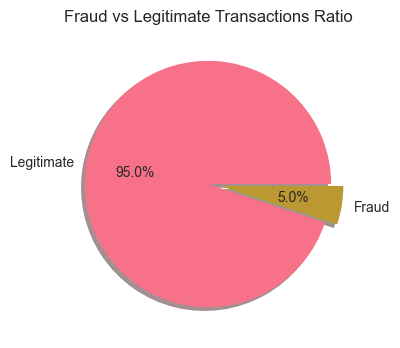

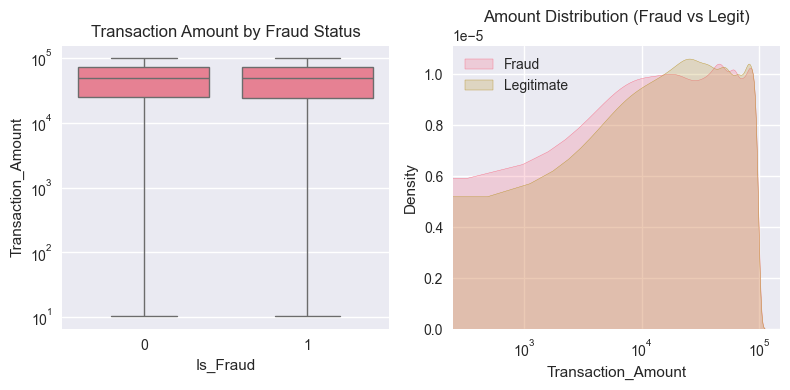

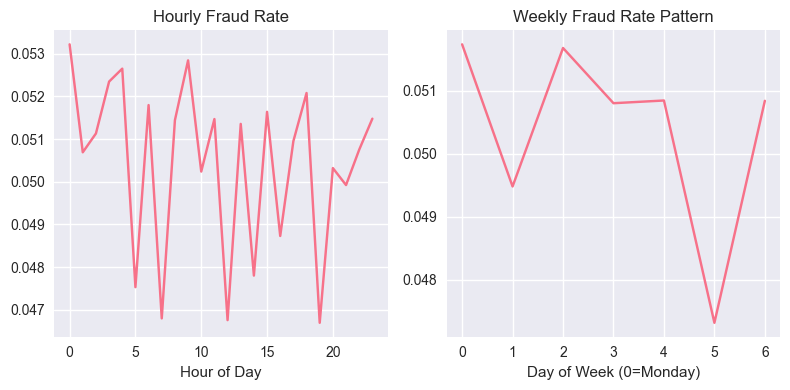

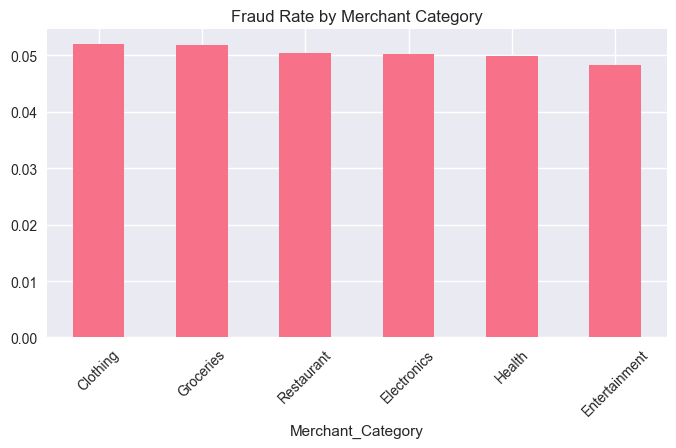

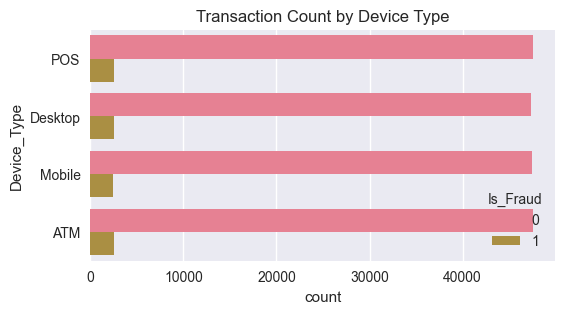

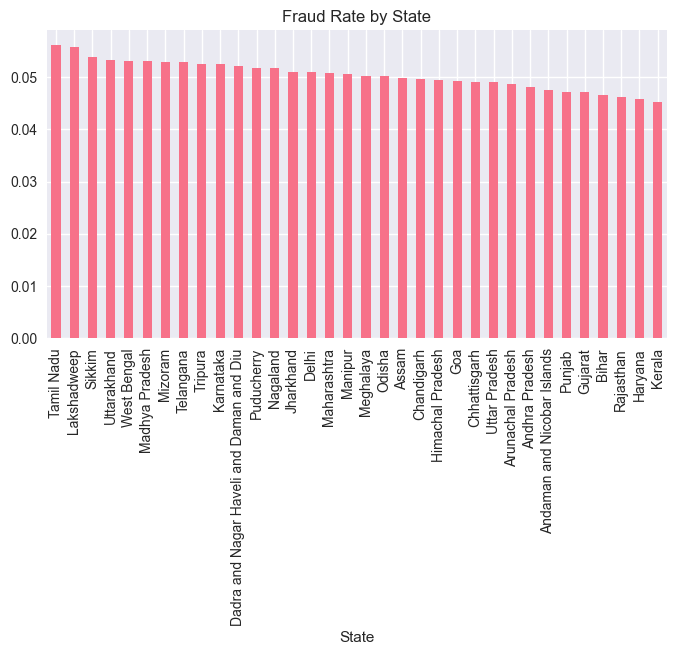

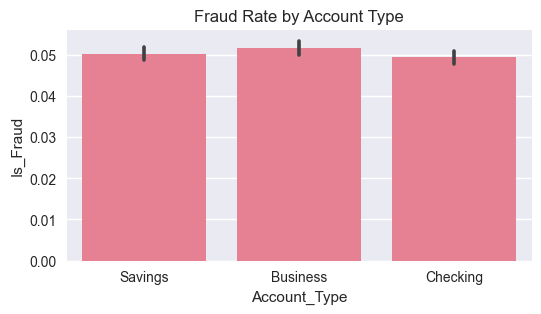

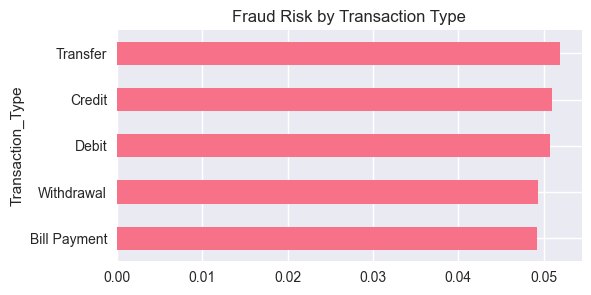

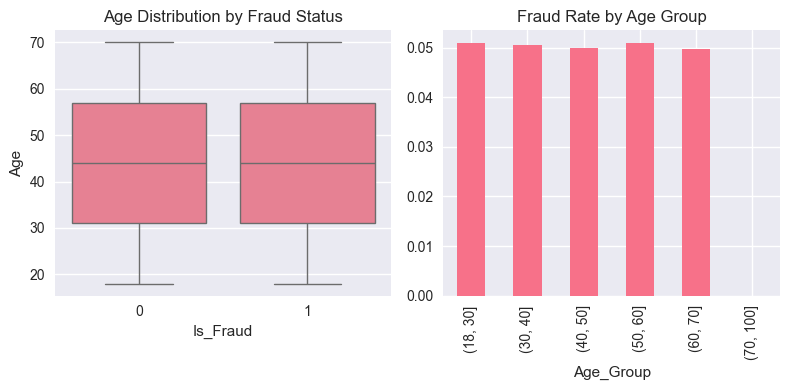

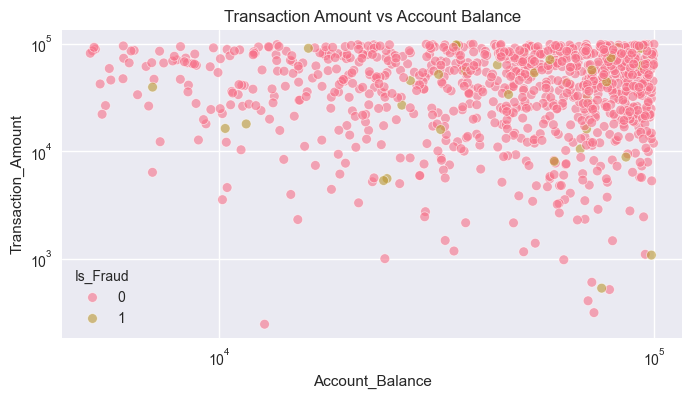

All plots saved to directory: EDA_Plots/


In [8]:

from datetime import datetime

import os

def visualize_bank_transactions(df, save_dir='bank_eda_plots'):
    """
    Custom EDA visualizations with automatic figure saving.
    
    Args:
        df (pd.DataFrame): Banking transaction data
        save_dir (str): Directory to save plots
    """
    # Create directory if doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    plt.style.use('seaborn')
    sns.set_palette("husl")
    
    # Fraud Class Distribution
    plt.figure(figsize=(8,4))
    fraud_counts = df['Is_Fraud'].value_counts(normalize=True)
    plt.pie(fraud_counts, labels=['Legitimate','Fraud'], autopct='%1.1f%%',
        explode=(0,0.1), shadow=True)
    plt.title("Fraud vs Legitimate Transactions Ratio")
    plt.savefig(f'{save_dir}/01_fraud_class_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Transaction Amount Analysis
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.boxplot(x='Is_Fraud', y='Transaction_Amount', data=df)
    plt.title("Transaction Amount by Fraud Status")
    plt.yscale('log')
    
    plt.subplot(1,2,2)
    fraud_amt = df[df['Is_Fraud']==1]['Transaction_Amount']
    legit_amt = df[df['Is_Fraud']==0]['Transaction_Amount'].sample(len(fraud_amt))
    sns.kdeplot(fraud_amt, label='Fraud', shade=True)
    sns.kdeplot(legit_amt, label='Legitimate', shade=True)

    plt.title("Amount Distribution (Fraud vs Legit)")
    plt.xscale('log')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig(f'{save_dir}/02_amount_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Temporal Patterns
    df['Transaction_Datetime'] = pd.to_datetime(df['Transaction_Date'] + ' ' + df['Transaction_Time'])
    
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    df.groupby(df['Transaction_Datetime'].dt.hour)['Is_Fraud'].mean().plot()
    plt.title("Hourly Fraud Rate")
    plt.xlabel("Hour of Day")
    
    plt.subplot(1,2,2)
    df.groupby(df['Transaction_Datetime'].dt.dayofweek)['Is_Fraud'].mean().plot()
    plt.title("Weekly Fraud Rate Pattern")
    plt.xlabel("Day of Week (0=Monday)")
    plt.tight_layout()
    plt.savefig(f'{save_dir}/03_temporal_patterns.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 4. Merchant Category Risk
    plt.figure(figsize=(8,4))
    merchant_fraud = df.groupby('Merchant_Category')['Is_Fraud'].mean().sort_values(ascending=False)
    merchant_fraud.plot(kind='bar')
    plt.title("Fraud Rate by Merchant Category")
    plt.xticks(rotation=45)
    plt.savefig(f'{save_dir}/04_merchant_risk.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 5. Device Type Analysis
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, y='Device_Type', hue='Is_Fraud')
    plt.title("Transaction Count by Device Type")
    plt.savefig(f'{save_dir}/05_device_type.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 6. Geographic Analysis
    plt.figure(figsize=(8,4))
    state_fraud = df.groupby('State')['Is_Fraud'].mean().sort_values(ascending=False)
    state_fraud.plot(kind='bar')
    plt.title("Fraud Rate by State")
    plt.savefig(f'{save_dir}/06_geographic_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 7. Account Type Vulnerability
    plt.figure(figsize=(6,3))
    sns.barplot(x='Account_Type', y='Is_Fraud', data=df, estimator=np.mean)
    plt.title("Fraud Rate by Account Type")
    plt.savefig(f'{save_dir}/07_account_type.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 8. Transaction Type Risk
    plt.figure(figsize=(6,3))
    trans_type_fraud = df.groupby('Transaction_Type')['Is_Fraud'].mean().sort_values()
    trans_type_fraud.plot(kind='barh')
    plt.title("Fraud Risk by Transaction Type")
    plt.savefig(f'{save_dir}/08_transaction_type.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 9. Age Distribution Analysis
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.boxplot(x='Is_Fraud', y='Age', data=df)
    plt.title("Age Distribution by Fraud Status")
    
    plt.subplot(1,2,2)
    bins = [18,30,40,50,60,70,100]
    df['Age_Group'] = pd.cut(df['Age'], bins=bins)
    df.groupby('Age_Group')['Is_Fraud'].mean().plot(kind='bar')
    plt.title("Fraud Rate by Age Group")
    plt.tight_layout()
    plt.savefig(f'{save_dir}/09_age_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 10. Balance vs Transaction Amount
    plt.figure(figsize=(8,4))
    sample_df = df.sample(1000)
    sns.scatterplot(x='Account_Balance', y='Transaction_Amount', 
                    hue='Is_Fraud', data=sample_df, alpha=0.6)
    plt.xscale('log')
    plt.yscale('log')
    plt.title("Transaction Amount vs Account Balance")
    plt.savefig(f'{save_dir}/10_balance_vs_amount.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"All plots saved to directory: {save_dir}/")

visualize_bank_transactions(bank_df, save_dir='EDA_Plots')

### Insights from the analysis

1. From the detailed plots, one can see that only 5% of transactions is fraudulant and 95% of the cases are legitimate. This means that the dataset is highly imbalanced. So we have to be careful when building our model. 
- We can do Oversampling the Minority Class or Undersampling of the Majority Class. 
- Algorithms like Random Forest, Gradient Boosting, and XGBoost are effective for handling imbalanced datasets, especially when combined with resampling techniques.
- Also, instead of trying to balance the dataset, we can approach the problem as an anomaly detection task, where the minority class is treated as an anomaly or outlier.

2. Relationship between transaction amounts and their relationship to fraud status:

- The box plot of  shows that both fraudulent (1) and legitimate (0) transactions have very similar distributions in terms of transaction amounts. The median values (horizontal line in each box) appear nearly identical.

- Both legitimate and fraudulent transactions span from around $10 to $100,000, suggesting that fraud occurs across various transaction sizes.

- The density plot shows significant overlap between the distribution curves for fraudulent (pink) and legitimate (tan) transactions. This suggests that transaction amount alone may not be a strong predictor of fraud.

- Both types of transactions show higher density around $10,000-$100,000, indicating that most transactions (both legitimate and fraudulent) occur in this range.

- There appear to be subtle differences in the distribution shapes - fraudulent transactions may have a slightly different pattern at certain amount ranges, but the overall similarity is quite striking.

3. The hourly fraud rate shows significant fluctuations throughout the day, with notable peaks in the early morning, around hours 4-5, and again near hour 10, while experiencing sharp dips at hours 7, 12, and 20. The weekly pattern reveals that fraud rates tend to be highest midweek (Wednesday, day 2) and lowest on weekends, particularly Saturday (day 5), with a consistent uptick on Sundays (day 6) as the new week approaches.

4. We can see similar fraud rates across merchant categories, with Clothing and Groceries experiencing slightly higher rates (~0.052) than Entertainment (~0.048). It is also revealed that legitimate transactions far outnumber fraudulent ones across all device types, with fraud consistently representing a small percentage of total transactions. The geographic variation in fraud rates across Indian states shows Tamil Nadu and Lakshadweep having notably higher rates (~0.055) compared to Kerala (~0.045). We can also see that Business accounts have marginally higher fraud rates than Savings accounts, while Checking accounts show the lowest fraud rate among the three types.

5. There is minimal variation in fraud rates across account types, with Business accounts having the highest rate at approximately 0.051, followed by Savings accounts at 0.050, and Checking accounts with the lowest rate at 0.049. It is also revealed that Transfer transactions have the highest fraud risk at roughly 0.051, while Withdrawal transactions show the lowest risk at about 0.049, with other transaction types falling between these values. The age distribution is nearly identical between fraudulent and legitimate transactions (box plot), with both having a median age around 45, and the bar chart confirms fraud rates remain consistent (approximately 0.05) across all age groups from 18 to 100. The transaction amounts versus account balances on logarithmic scales shows that fraudulent transactions (gold dots) are distributed similarly to legitimate ones (pink dots), with no clear pattern distinguishing them based on these two variables alone.


This suggests that fraud detection systems would need to rely on features beyond just transaction amount to effectively identify fraudulent activities, as the amount alone doesn't provide clear separation between legitimate and fraudulent transactions.

In [9]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Gender                   200000 non-null  object        
 1   Age                      200000 non-null  int64         
 2   State                    200000 non-null  object        
 3   City                     200000 non-null  object        
 4   Bank_Branch              200000 non-null  object        
 5   Account_Type             200000 non-null  object        
 6   Transaction_Date         200000 non-null  object        
 7   Transaction_Time         200000 non-null  object        
 8   Transaction_Amount       200000 non-null  float64       
 9   Transaction_Type         200000 non-null  object        
 10  Merchant_Category        200000 non-null  object        
 11  Account_Balance          200000 non-null  float64       
 12  Transaction_Devi

### Preprocess dataset

In [10]:
def preprocess_bank_data(df, datetime_cols=['Transaction_Date', 'Transaction_Time'], 
                        categorical_cols=['Gender', 'State', 'City', 'Bank_Branch', 
                                         'Account_Type', 'Transaction_Type', 
                                         'Merchant_Category', 'Transaction_Device',
                                         'Transaction_Location', 'Device_Type',
                                         'Transaction_Description']):
    """
    Preprocess banking transaction data by:
    1. Converting datetime columns to proper datetime format
    2. Label encoding categorical columns
    3. Extracting useful datetime features
    
    Args:
        df (pd.DataFrame): Raw banking transaction data
        datetime_cols (list): Columns containing datetime information
        categorical_cols (list): Columns to label encode
        
    Returns:
        pd.DataFrame: Processed dataframe with new features
        dict: Label encoders for each categorical column (for inverse transformation)
    """
    
    # Create copy to avoid modifying original dataframe
    processed_df = df.copy()
    encoders = {}
    
    # Datetime Processing
    if all(col in processed_df.columns for col in datetime_cols):
        # Combine date and time columns
        processed_df['Transaction_Datetime'] = pd.to_datetime(
            processed_df['Transaction_Date'] + ' ' + processed_df['Transaction_Time']
        )
        
        # Extract temporal features
        processed_df['Transaction_Hour'] = processed_df['Transaction_Datetime'].dt.hour
        processed_df['Transaction_DayOfWeek'] = processed_df['Transaction_Datetime'].dt.dayofweek
        processed_df['Transaction_DayOfMonth'] = processed_df['Transaction_Datetime'].dt.day
        processed_df['Transaction_Month'] = processed_df['Transaction_Datetime'].dt.month
        processed_df['Transaction_IsWeekend'] = processed_df['Transaction_Datetime'].dt.dayofweek >= 5
        
        # Drop original columns
        processed_df.drop(datetime_cols, axis=1, inplace=True)
        processed_df.drop('Transaction_Datetime', axis=1, inplace=True)
    
    # Categorical Encoding
    for col in categorical_cols:
        if col in processed_df.columns:
            le = LabelEncoder()
            processed_df[col] = le.fit_transform(processed_df[col].astype(str))
            encoders[col] = le  # Save encoder for inverse transformation
            
            # # Add frequency encoding as additional feature
            # freq_encoded = processed_df[col].map(processed_df[col].value_counts(normalize=True))
            # processed_df[f'{col}_Freq'] = freq_encoded
    
    # Additional useful features
    if 'Transaction_Amount' in processed_df.columns and 'Account_Balance' in processed_df.columns:
        processed_df['Amount_Balance_Ratio'] = processed_df['Transaction_Amount'] / (processed_df['Account_Balance'] + 1e-6)
    return processed_df, encoders

processed_df, encoders = preprocess_bank_data(bank_df)

The **`Amount_Balance_Ratio`** feature is essential because it provides critical context about the relative impact of each transaction on an account’s financial state, which absolute transaction amounts alone cannot reveal. In banking and fraud detection, a $1,000 transaction behaves drastically differently for a customer with a $2,000 balance versus one with $100,000, the former represents a high-risk scenario (50% of the balance), while the latter is likely routine (1%). This ratio helps identify suspicious patterns, such as fraudsters testing accounts with small withdrawals before draining them or sudden large withdrawals that deviate from a customer’s typical behavior. It also aids in monitoring financial health, flagging accounts with recurring high-ratio transactions that may indicate liquidity issues or reckless spending. By normalizing transaction amounts against balances, the ratio surfaces hidden risks that raw values might miss, making it indispensable for risk modeling, anomaly detection, and regulatory compliance. The small epsilon (`+ 1e-6`) ensures numerical stability for near-zero balances without distorting insights. This feature transforms transactional data into actionable intelligence, bridging the gap between abstract numbers and real-world financial vulnerability.

In [11]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Gender                   200000 non-null  int64   
 1   Age                      200000 non-null  int64   
 2   State                    200000 non-null  int64   
 3   City                     200000 non-null  int64   
 4   Bank_Branch              200000 non-null  int64   
 5   Account_Type             200000 non-null  int64   
 6   Transaction_Amount       200000 non-null  float64 
 7   Transaction_Type         200000 non-null  int64   
 8   Merchant_Category        200000 non-null  int64   
 9   Account_Balance          200000 non-null  float64 
 10  Transaction_Device       200000 non-null  int64   
 11  Transaction_Location     200000 non-null  int64   
 12  Device_Type              200000 non-null  int64   
 13  Is_Fraud                 200000 non-null  in

In [12]:
# For numerical columns, we'll fill missing values with the median of each column
numerical_columns = processed_df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    processed_df[col] = processed_df[col].fillna(processed_df[col].median())

print(numerical_columns)

Index(['Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type',
       'Transaction_Amount', 'Transaction_Type', 'Merchant_Category',
       'Account_Balance', 'Transaction_Device', 'Transaction_Location',
       'Device_Type', 'Is_Fraud', 'Transaction_Description',
       'Amount_Balance_Ratio'],
      dtype='object')


### Plot Correlation Matrix to Understand Feature Relationships

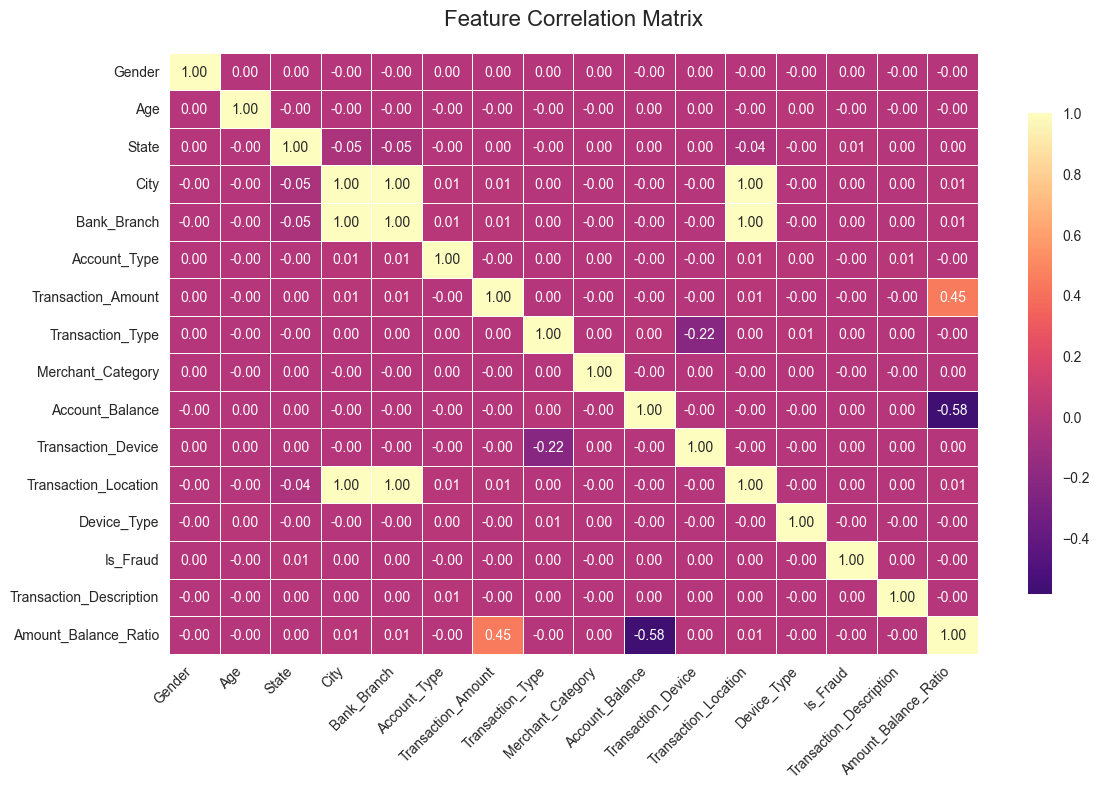

In [13]:
def plot_correlation_matrix(processed_df, figsize=(12, 8), annot=True, cmap='magma', save_dir='EDA_Plots'):
    """
    Plots a correlation matrix for numeric features in the preprocessed DataFrame.
    
    Args:
        processed_df: DataFrame after preprocessing (with numeric/encoded features)
        figsize: Size of the output figure
        annot: Whether to display correlation values on the heatmap
        cmap: Color palette for the heatmap
    """
    # Select only numeric columns (includes label-encoded categoricals)
    numeric_cols = processed_df.select_dtypes(include=['int64', 'float64']).columns
    
    # Calculate correlation matrix
    corr_matrix = processed_df[numeric_cols].corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=figsize)
    
    # Generate the heatmap
    sns.heatmap(corr_matrix, 
                annot=annot, 
                fmt=".2f", 
                cmap=cmap,
                center=0,
                linewidths=0.5,
                cbar_kws={"shrink": 0.8})
    
    plt.title("Feature Correlation Matrix", pad=20, fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Save and show
    plt.savefig(f'{save_dir}/correlation_matrix.png', dpi=300, bbox_inches='tight')
    # plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()


plot_correlation_matrix(processed_df)

Looking at this feature correlation matrix, several key patterns can be seen:

**Strong positive correlations (1.00)**:
   - City and Bank_Branch are perfectly correlated, suggesting they represent essentially the same information
   - City/Bank_Branch and Transaction_Location also show perfect correlation (1.00), indicating redundancy in these features

**Moderate correlations with financial metrics**:
   - Transaction_Amount and Amount_Balance_Ratio show a moderate positive correlation (0.45)
   - Account_Balance and Amount_Balance_Ratio have a notable negative correlation (-0.58)

**Transaction-related correlations**:
   - Transaction_Type and Transaction_Device have a weak negative correlation (-0.22)

**Fraud indicators**:
   - Surprisingly, the Is_Fraud variable shows very weak correlations with all other features, with the strongest being with State (0.01)
   - This suggests that fraud may not be strongly associated with any single variable in isolation

**Redundant features**:
   - The City, Bank_Branch, and Transaction_Location variables appear to be redundant and could be consolidated
   - Most demographic features (Gender, Age) show minimal correlation with other variables

This correlation matrix reveals that fraud detection likely requires more complex pattern recognition beyond simple correlations, as fraudulent transactions don't strongly correlate with any individual feature in this dataset.

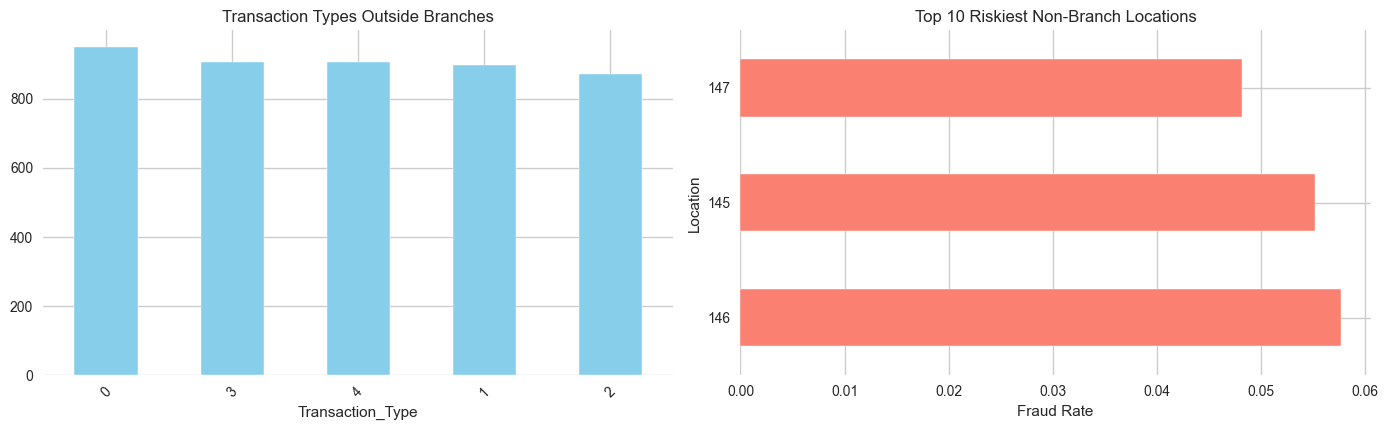

In [14]:
# Get all transactions that didn't occur at bank branches
non_branch_transactions = processed_df[~processed_df['Transaction_Location'].isin(processed_df['Bank_Branch'])]

def visualize_non_branch_transactions(non_branch_transactions, top_locations=10):
    """
    Visualizes patterns in transactions occurring outside bank branches.
    
    Args:
        non_branch_transactions: DataFrame from your filter
        top_locations: Number of top locations to display
    """
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")
    
    # 1. Transaction Type Distribution
    plt.subplot(2, 2, 1)
    type_counts = non_branch_transactions['Transaction_Type'].value_counts()
    type_counts.plot(kind='bar', color='skyblue')
    plt.title("Transaction Types Outside Branches")
    plt.xticks(rotation=45)
    
    # 2. Fraud Rate by Location
    plt.subplot(2, 2, 2)
    location_fraud = non_branch_transactions.groupby('Transaction_Location')['Is_Fraud'].mean().sort_values(ascending=False)[:top_locations]
    location_fraud.plot(kind='barh', color='salmon')
    plt.title(f"Top {top_locations} Riskiest Non-Branch Locations")
    plt.xlabel("Fraud Rate")
    plt.ylabel("Location")
    plt.tight_layout()
    plt.savefig('non_branch_transactions_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

visualize_non_branch_transactions(non_branch_transactions, top_locations=10)

# Transaction_Type = ['Transfer', 'Bill Payment', 'Debit', 'Withdrawal', 'Credit']


### Feature Importance using Random Forest

In [15]:
processed_df.isnull().sum()

Gender                        0
Age                           0
State                         0
City                          0
Bank_Branch                   0
Account_Type                  0
Transaction_Amount            0
Transaction_Type              0
Merchant_Category             0
Account_Balance               0
Transaction_Device            0
Transaction_Location          0
Device_Type                   0
Is_Fraud                      0
Transaction_Description       0
Age_Group                  3712
Transaction_Hour              0
Transaction_DayOfWeek         0
Transaction_DayOfMonth        0
Transaction_Month             0
Transaction_IsWeekend         0
Amount_Balance_Ratio          0
dtype: int64

In [16]:
processed_df.drop(columns=['Age_Group'], inplace=True)
processed_df.isnull().sum()

Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_Amount         0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Description    0
Transaction_Hour           0
Transaction_DayOfWeek      0
Transaction_DayOfMonth     0
Transaction_Month          0
Transaction_IsWeekend      0
Amount_Balance_Ratio       0
dtype: int64

In [17]:
processed_df.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,...,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,Transaction_Hour,Transaction_DayOfWeek,Transaction_DayOfMonth,Transaction_Month,Transaction_IsWeekend,Amount_Balance_Ratio
0,1,60,15,127,127,2,32415.45,3,5,74557.27,...,129,3,0,9,16,3,23,1,False,0.434772
1,0,51,18,100,100,0,43622.60,0,5,74622.66,...,102,1,0,65,17,5,11,1,True,0.584576
2,1,20,4,13,13,2,63062.56,0,3,66817.99,...,13,1,0,102,3,5,25,1,True,0.943796
3,0,57,28,22,22,0,14000.72,2,2,58177.08,...,24,2,0,51,12,6,19,1,True,0.240657
4,0,43,25,7,7,2,18335.16,3,2,16108.56,...,7,2,0,37,18,3,30,1,False,1.138225


Data Shapes:
X: (200000, 20), y: (200000,)

Feature Columns:
['Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type', 'Transaction_Amount', 'Transaction_Type', 'Merchant_Category', 'Account_Balance', 'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Transaction_Description', 'Transaction_Hour', 'Transaction_DayOfWeek', 'Transaction_DayOfMonth', 'Transaction_Month', 'Transaction_IsWeekend', 'Amount_Balance_Ratio']


<Figure size 1200x800 with 0 Axes>

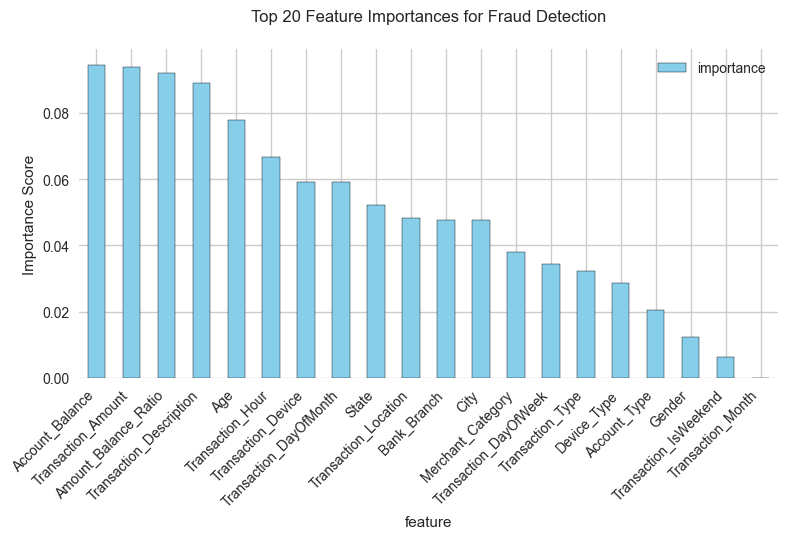

In [ ]:
def train_and_analyze_rf(processed_df, target_col='Is_Fraud', 
                         n_estimators=100, random_state=42, 
                         top_n_features=20, figsize=(12, 8)):
    """
    Trains a Random Forest classifier and analyzes feature importances.
    
    Args:
        processed_df (pd.DataFrame): Preprocessed DataFrame containing features and target
        target_col (str): Name of the target column (default: 'Is_Fraud')
        n_estimators (int): Number of trees in the forest (default: 100)
        random_state (int): Random seed for reproducibility (default: 42)
        top_n_features (int): Number of top features to display (default: 20)
        figsize (tuple): Figure size for the importance plot (default: (12, 8))
        
    Returns:
        tuple: (trained RandomForest model, feature importance DataFrame)
    """
    try:
        # Validate input
        if target_col not in processed_df.columns:
            raise ValueError(f"Target column '{target_col}' not found in DataFrame")
            
        # Prepare data
        X = processed_df.drop(columns=[target_col])
        y = processed_df[target_col]
        
        print("="*50)
        print("Data Shapes:")
        print(f"X: {X.shape}, y: {y.shape}")
        print("\nFeature Columns:")
        print(X.columns.tolist())
        print("="*50)
        
        # Check for NaN values
        if X.isnull().any().any() or y.isnull().any():
            raise ValueError("Data contains NaN values - please handle missing data first")
        
        # Train model
        rf = RandomForestClassifier(n_estimators=n_estimators, 
                                  random_state=random_state,
                                  class_weight='balanced')  # Handles class imbalance
        rf.fit(X, y)
        
        # Get feature importances
        feature_importances = pd.DataFrame({
            'feature': X.columns,
            'importance': rf.feature_importances_
        }).sort_values('importance', ascending=False)
        
        # Plot top features
        plt.figure(figsize=figsize)
        feature_importances.head(top_n_features).plot(
            x='feature', y='importance', kind='bar', 
            color='skyblue', edgecolor='black'
        )
        plt.title(f"Top {top_n_features} Feature Importances for Fraud Detection", pad=20)
        plt.ylabel("Importance Score")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        return rf, feature_importances
    
    except Exception as e:
        print(f"Error: {str(e)}")
        return None, None


# First train the model and get importances (as you're already doing)
rf_model, importances = train_and_analyze_rf(processed_df)


Found 18 important features (importance > 0.01):
                    feature  importance
9           Account_Balance    0.094564
6        Transaction_Amount    0.093767
19     Amount_Balance_Ratio    0.092139
13  Transaction_Description    0.088908
1                       Age    0.077831
14         Transaction_Hour    0.066605
10       Transaction_Device    0.059161
16   Transaction_DayOfMonth    0.059075
2                     State    0.052304
11     Transaction_Location    0.048389
4               Bank_Branch    0.047578
3                      City    0.047548
8         Merchant_Category    0.037968
15    Transaction_DayOfWeek    0.034369
7          Transaction_Type    0.032129
12              Device_Type    0.028557
5              Account_Type    0.020510
0                    Gender    0.012223

DataFrame with important features only:
Original shape: (200000, 21)
New shape: (200000, 19)


<Figure size 1000x600 with 0 Axes>

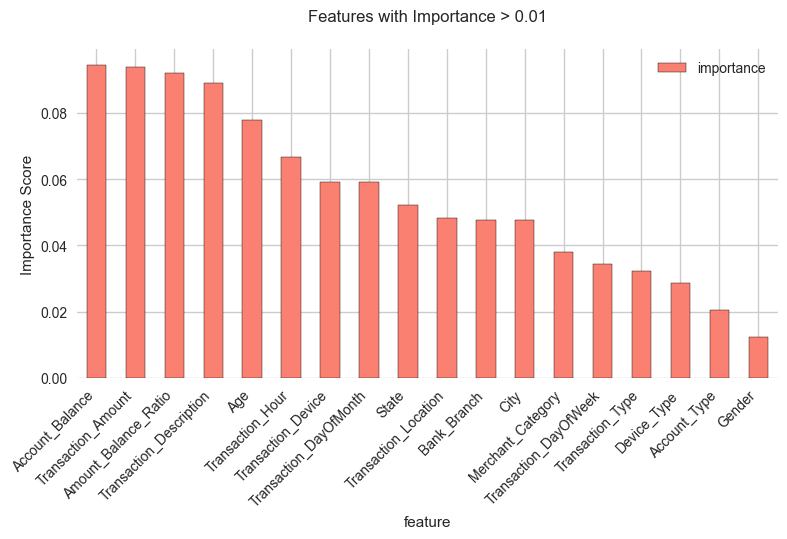

In [ ]:
# Filter features with importance > 0.01
important_features = importances[importances['importance'] > 0.01]
print(f"\nFound {len(important_features)} important features (importance > 0.01):")
print(important_features)

# Create new DataFrame with only important features
important_feature_names = important_features['feature'].tolist()
processed_df_important = processed_df[important_feature_names + ['Is_Fraud']]  # Keep target column

print("\nDataFrame with important features only:")
print(f"Original shape: {processed_df.shape}")
print(f"New shape: {processed_df_important.shape}")

# Visualize just the important features
plt.figure(figsize=(10, 6))
important_features.plot(x='feature', y='importance', kind='bar', 
                       color='salmon', edgecolor='black')
plt.title("Features with Importance > 0.01", pad=20)
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
processed_df_important.columns

Index(['Account_Balance', 'Transaction_Amount', 'Amount_Balance_Ratio',
       'Transaction_Description', 'Age', 'Transaction_Hour',
       'Transaction_Device', 'Transaction_DayOfMonth', 'State',
       'Transaction_Location', 'Bank_Branch', 'City', 'Merchant_Category',
       'Transaction_DayOfWeek', 'Transaction_Type', 'Device_Type',
       'Account_Type', 'Gender', 'Is_Fraud'],
      dtype='object')

In [28]:
target_col = 'Is_Fraud'
# Split the data into features and target
X = processed_df_important.drop(columns=[target_col])
y = processed_df_important[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Different Models Training and Evaluation

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': cb.CatBoostClassifier(silent=True),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM (RBF)': SVC(kernel='rbf', probability=True),
}
# Define reduced parameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1],
        'solver': ['liblinear'],
        'penalty': ['l2']
    },
    'Decision Tree': {
        'max_depth': [5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [10],
        'min_samples_split': [2],
        'min_samples_leaf': [1]
    },
    'Gradient Boosting': {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [5]
    },
    'XGBoost': {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [5],
        'subsample': [0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [3, 5],
    },
    'CatBoost': {
        'iterations': [100],
        'learning_rate': [0.1],
        'depth': [3, 5]
    },
    'KNN': {
        'n_neighbors': [3],
        'weights': ['uniform', 'distance']
    },
    'AdaBoost': {
        'n_estimators': [100],
        'learning_rate': [0.01, 0.1]
    },
    'Bagging': {
        'n_estimators': [100],
        'max_samples': [0.8, 1.0]
    },
    'SVM (RBF)': {
        'C': [1, 10],
        'gamma': ['scale', 'auto']
    }
}

In [31]:
# Initialize an empty dictionary to store results
model_results = {}

# Handle class imbalance by computing class weights for each model that supports it
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("class_weight_dict: ", class_weight_dict)

# Handle SMOTE for class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Evaluate models with GridSearchCV
for model_name, model in models.items():
    print(f"Training model with GridSearchCV: {model_name}")

    # Get the parameter grid for the model
    param_grid = param_grids[model_name]

    # Modify model to include class weights where applicable
    if model_name in ['Logistic Regression', 'Random Forest', 'SVM (RBF)', 'SVM (Linear)']:
        # Assign class weights for models that support it
        if model_name == 'Logistic Regression':
            model = LogisticRegression(class_weight='balanced')
        elif model_name == 'Random Forest':
            model = RandomForestClassifier(class_weight='balanced')
        elif model_name in ['SVM (RBF)', 'SVM (Linear)']:
            model = SVC(probability=True, class_weight='balanced') if model_name == 'SVM (RBF)' else LinearSVC(class_weight='balanced')

    # Perform GridSearchCV with parallelism
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

    # Fit the model with the best parameters using the resampled data
    grid_search.fit(X_train_smote, y_train_smote)

    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    # Predict on both train and test sets
    y_train_pred = best_model.predict(X_train_smote)
    y_test_pred = best_model.predict(X_test_scaled)

    # Store the results
    model_results[model_name] = {
        'train_accuracy': best_model.score(X_train_smote, y_train_smote),
        'test_accuracy': best_model.score(X_test_scaled, y_test),
        'y_test': y_test,
        'y_test_pred': y_test_pred,
        'classification_report': classification_report(y_test, y_test_pred),
        'roc_auc': roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
    }

    # Print results after all models are evaluated
    print("\nModel Evaluation Results:")
    print(f"Model: {model_results[model_name]}\n")
    print(f"Train Accuracy: {model_results[model_name]['train_accuracy']:.4f}")
    print(f"Test Accuracy: {model_results[model_name]['test_accuracy']:.4f}")
    print(f"ROC AUC: {model_results[model_name]['roc_auc']:.4f}\n")
    print(f"Classification Report:\n{model_results[model_name]['classification_report']}")
    print("-" * 80)

class_weight_dict:  {0: 0.5264647235731161, 1: 9.946537361680965}
Training model with GridSearchCV: Logistic Regression
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   1.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   1.2s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   1.2s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   1.3s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   1.3s
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Model Evaluation Results:
Model: {'train_accuracy': 0.513885507084241, 'test_accuracy': 0.49145, 'y_test': 119737    0
72272     0
158154    0
65426     0
30074     0
         ..
4174      0
91537     0
156449    0
184376    0
6584      0
Nam

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R

[CV] END ...............learning_rate=0.01, n_estimators=100; total time=  45.4s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=  45.9s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=  46.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=  46.2s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=  46.7s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=  47.1s
Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 100}

Model Evaluation Results:
Model: {'train_accuracy': 0.7342669307764697, 'test_accuracy': 0.67405, 'y_test': 119737    0
72272     0
158154    0
65426     0
30074     0
         ..
4174      0
91537     0
156449    0
184376    0
6584      0
Name: Is_Fraud, Length: 40000, dtype: int64, 'y_test_pred': array([0, 0, 0, ..., 0, 1, 1]), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.95 

KeyboardInterrupt: 

### Displaying Evaluation Results for All Models


In [ ]:
# # Print results after all models are evaluated
# print("\nModel Evaluation Results:")
# print(f"Model: {model_results[model_name]}\n")
# print(f"Train Accuracy: {model_results[model_name]['train_accuracy']:.4f}")
# print(f"Test Accuracy: {model_results[model_name]['test_accuracy']:.4f}")
# print(f"ROC AUC: {model_results[model_name]['roc_auc']:.4f}\n")
# print(f"Classification Report:\n{model_results[model_name]['classification_report']}")
# print("-" * 80)

1. The model demonstrates strong overall accuracy, indicating its ability to correctly predict the majority of instances within the dataset.
   
2. There is a noticeable discrepancy between training and testing accuracy, which may suggest some degree of overfitting, although the difference is not extreme.

3. The ROC AUC score is close to random guessing, indicating that the model struggles with distinguishing between the two classes, especially for the minority class.

4. Class imbalance is a significant issue, as the model shows excellent performance on the majority class but fails to effectively identify the minority class.

5. Precision and recall for the majority class are very high, showcasing that the model can accurately predict this class without many false positives or negatives.

6. The performance for the minority class is poor, with the model having difficulty detecting and correctly predicting instances of this class.

7. The model's inability to perform well on the minority class suggests a bias toward the majority class, which reduces its overall usefulness in cases where detecting the minority class is important.

8. There is an imbalance between the precision and recall of the two classes, with the model being much more sensitive to the majority class.

9. Improvements to the model should focus on addressing class imbalance, such as through resampling techniques, class weighting, or exploring alternative models that are more adept at handling skewed distributions.

10. The current model, while performing well on the majority class, needs further optimization and tuning to ensure it can reliably detect the minority class and be more robust across all categories.

### Train Vs Test Accuracy Chart

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Initialize a list to store results for all models
results_list = []

# Iterate through the models to collect results and plot confusion matrix and ROC curve
for model_name, model in model_results.items():
    # Extract the predicted values and actual values
    y_test_pred = model['y_test_pred']  # Use the predicted labels
    y_test = model['y_test']  # Actual true labels

    # Extract metrics
    train_accuracy = model['train_accuracy']
    test_accuracy = model['test_accuracy']
    roc_auc = model['roc_auc']

    # Classification Report
    clf_report = classification_report(y_test, y_test_pred)

    # Print the model name followed by its evaluation metrics
    print("-" * 40)
    print(f"Model: {model_name}")
    print("-" * 40)
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(clf_report)
    print("-" * 80)  # Separator line for clarity

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_pred)
    roc_auc_value = auc(fpr, tpr)

    # Create subplots: 1 row, 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Width, Height

    # Plot ROC Curve on the first subplot
    ax1.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title(f'ROC Curve for {model_name}')
    ax1.legend(loc='lower right')

    # Plot Confusion Matrix on the second subplot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'], ax=ax2)
    ax2.set_title(f'Confusion Matrix for {model_name}')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')

    # Show both plots
    plt.tight_layout()
    plt.show()

    # Append the results to the list for the DataFrame
    results_list.append({
        'Model': model_name,
        'Train Accuracy': f"{train_accuracy:.4f}",
        'Test Accuracy': f"{test_accuracy:.4f}",
        'ROC AUC': f"{roc_auc:.4f}",
        'Classification Report': clf_report
    })

# Convert results into a DataFrame for better presentation
results_df = pd.DataFrame(results_list)

# Print the summary of results in a tabular format
# print("\nSummary of Model Evaluation Results:")
# print(results_df.to_string(index=False))  # Display as a pretty table
print("-" * 80)


### Concluding Remarks

1. **High Test Accuracy**: The model achieved a high test accuracy, indicating that it correctly predicted most instances in the test set. This is a promising result for the overall performance of the model.
   
2. **ROC AUC**: The **ROC AUC** is nearly 0.5, which is close to random guessing. This suggests that the model struggles to distinguish between the two classes effectively. The low ROC AUC indicates poor discriminative power, especially for class 1.

3. **Class Imbalance**: The classification report highlights a significant class imbalance.
   - **Class 0** (majority class) has a high precision of **0.95** and recall of **1.00**, with an **F1-score of 0.97**, indicating that the model performs very well on class 0.
   - **Class 1** (minority class) has very low precision (**0.02**) and recall (**0.00**), with an **F1-score of 0.00**, indicating that the model struggles severely to identify the minority class (class 1).
   
4. **Impact of Class Imbalance**: The poor performance on class 1 suggests that the model may be biased towards predicting the majority class (class 0), and thus failing to identify the minority class. This is supported by the low recall and precision for class 1.

5. **Model Improvement Suggestions**:
   - **Address Class Imbalance**: Techniques such as resampling (SMOTE), class weights adjustment, or using more balanced metrics like **F1-score** for class 1 can help improve the model's ability to detect the minority class.
   - **Model Tuning**: Exploring other models or hyperparameters to better balance accuracy across both classes may improve performance.

7. **Final Remarks**: While the model shows strong performance in terms of overall accuracy, it is heavily biased towards the majority class, which makes it unreliable for detecting the minority class. Addressing the class imbalance should be a priority for improving model performance in real-world scenarios.